In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fhs_train.csv')
print(df.head())
print(df.isnull().sum())

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77.0           

In [3]:
rows_with_nan = np.isnan(df).any(axis=1)
df = df[~rows_with_nan]

In [4]:
from sklearn.model_selection import train_test_split
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

Best k: 51
R-squared of the best model: 0.019294209282689545


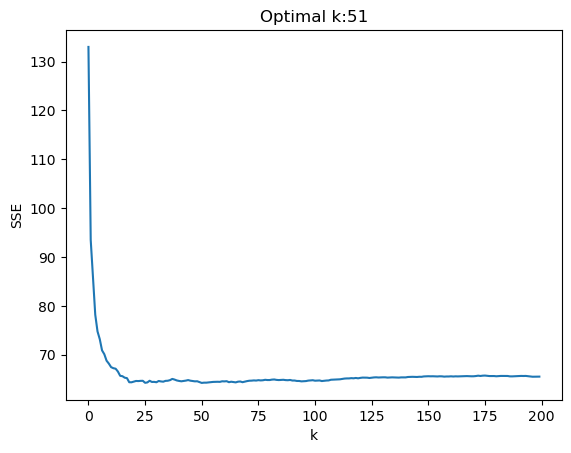

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
k_bar = 200
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)
r2_scores = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test - y_hat)**2)
    r2_scores[k] = r2_score(y_test, y_hat)

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = k_grid[min_index][0]
print("Best k:", k_star)

print("R-squared of the best model:", r2_scores[min_index][0])

plt.plot(np.arange(0, k_bar), SSE)
plt.xlabel("k")
plt.title("Optimal k:" + str(k_star))
plt.ylabel('SSE')
plt.show()
#not a very good r2... am going to have to make a lot of changes later on. 